<a href="https://colab.research.google.com/github/psiudo/Statististical-Rethinking/blob/main/Chap5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. The Many Variables & The Spurious Waffles

# 미국 각 주의 와플집 개수와 이혼율 사이의 관계 분석

## 배경
미국에서 와플하우스(Waffle House)는 신뢰할 수 있는 아침 식사 장소로 잘 알려져 있다. 하지만 와플하우스의 밀집도와 각 주의 이혼율 사이에 높은 상관관계가 있다는 사실은 통계적 오해를 낳는다.

조지아주와 앨라배마처럼 와플하우스가 많은 주들은 이혼율도 높고, 반대로 와플하우스가 없는 주들은 낮은 이혼율을 보인다. 그렇다면, **와플이 결혼을 위험에 빠뜨리는 것일까?**

### 답: 아니다.
이는 **상관관계와 인과관계를 혼동한 전형적인 사례**이다. 와플하우스는 조지아주에서 시작되어 주로 미국 남부 지역에 퍼졌으며, 마침 남부 지역은 미국 내에서 이혼율이 높은 곳으로도 알려져 있다. 따라서 와플하우스와 이혼율 간의 상관관계는 단지 역사적, 지역적 우연일 뿐이다.

---

## 상관관계와 인과관계를 구분하기

상관관계가 인과관계를 의미하지는 않는다. 단순한 상관관계를 넘어 인과 관계를 파악하기 위해서는 **다중 회귀 분석(Multiple Regression)**과 같은 통계 도구가 필요하다.

### 다중 회귀의 주요 장점
1. **교란변수 통제 (Statistical Control for Confounds)**  
   교란변수란 주요 변수 간의 관계를 왜곡하거나 잘못된 결론을 이끌어내는 변수이다.  
   예: "남부 지역"이라는 교란변수가 와플하우스와 이혼율의 관계를 오도함.

2. **다중 원인 분석 (Multiple and Complex Causation)**  
   많은 현상은 여러 원인이 동시에 작용한 결과이다. 다중 회귀는 여러 변수들을 한 모델에서 함께 분석한다.

3. **상호작용 효과 분석 (Interaction Effects)**  
   한 변수의 효과가 다른 변수에 의해 달라질 수 있다.  
   예: 식물이 자라는 데 빛과 물이 모두 필요하며, 둘 중 하나라도 부족하면 다른 변수의 효과가 나타나지 않는다.



## 5.1. Spurious association

## 사례 연구: 결혼율과 이혼율

### 질문
결혼율이 높은 주는 이혼율도 높은데, 결혼이 이혼을 유발하는가?

- 결혼하지 않으면 이혼할 수 없다는 점에서 둘 사이의 관계는 명백하다.  
- 하지만 결혼율이 높다고 해서 반드시 이혼율이 높아지는 것은 아니다. 높은 결혼율은 단지 **결혼을 중시하는 문화**를 반영할 수도 있다.

### 또 다른 변수: 결혼 연령
- 결혼 연령이 높을수록 이혼율이 낮아지는 경향이 있다.  
- 이는 나이가 들수록 더 성숙한 판단을 통해 결혼 생활을 유지할 가능성이 높아지기 때문일 수 있다.

---

## 다중 회귀를 통한 해석

### 모델 정의
결혼율 $(M)$과 결혼 연령 $(A)$을 동시에 고려한 회귀 모델은 다음과 같다:

$$
[
D_i \sim \mathcal{N}(\mu_i, \sigma)
]
[
\mu_i = \alpha + \beta_M M_i + \beta_A A_i
]
$$

- $(D_i)$: 주 $(i)$의 이혼율  
- $(M_i)$: 주 $(i)$의 결혼율  
- $(A_i)$: 주 $(i)$의 결혼 연령  
- $(\alpha, \beta_M, \beta_A)$: 절편 및 회귀 계수

### 분석 결과
1. **결혼율과 결혼 연령의 독립적 영향**  
   각 변수는 이혼율에 독립적으로 영향을 미칠 수 있다.

2. **변수 간 상호작용 평가**  
   결혼율과 결혼 연령을 동시에 고려하지 않으면 이혼율의 관계를 정확히 설명할 수 없다.

3. **교란 효과 제거**  
   다중 회귀를 통해 특정 변수의 효과를 명확히 하고, 교란 변수를 통제할 수 있다.

---

## 다중회귀 = 인과 관계를 파악하는 도구

다중 회귀는 단순한 상관관계를 넘어서 복잡한 변수들 간의 관계를 이해하는 데 중요한 도구이다.  
그러나 모델을 사용할 때는 신중해야 한다. 잘못된 변수 추가나 해석은 잘못된 결론을 초래할 수 있다.

인과 추론은 항상 특정한 가정에 의존하므로, 데이터를 분석할 때는 신중한 설계와 분석이 필수적이다.

In [1]:
import pandas as pd

# WaffleDivorce 데이터 다운로드
!wget https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/WaffleDivorce.csv

# 데이터 로드
data = pd.read_csv("WaffleDivorce.csv", sep=';')

# 데이터 확인
print(data.head())
print(data.columns)


--2025-01-18 19:59:05--  https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/WaffleDivorce.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3189 (3.1K) [text/plain]
Saving to: ‘WaffleDivorce.csv’

WaffleDivorce.csv   100%[===================>]   3.11K  --.-KB/s    in 0s      

2025-01-18 19:59:05 (51.0 MB/s) - ‘WaffleDivorce.csv’ saved [3189/3189]

     Location Loc  Population  MedianAgeMarriage  Marriage  Marriage SE  \
0     Alabama  AL        4.78               25.3      20.2         1.27   
1      Alaska  AK        0.71               25.2      26.0         2.93   
2     Arizona  AZ        6.33               25.8      20.3         0.98   
3    Arkansas  AR        2.92               24.3      26.4         1.70   
4  California  CA      

In [2]:
from sklearn.preprocessing import StandardScaler

# Divorce와 MedianAgeMarriage 열 표준화
scaler = StandardScaler()
data["D"] = scaler.fit_transform(data[["Divorce"]])
data["A"] = scaler.fit_transform(data[["MedianAgeMarriage"]])

# 표준화된 데이터 확인
print(data[["D", "A"]].head())


          D         A
0  1.671000 -0.612445
1  1.560044 -0.693671
2  0.616916 -0.206314
3  2.114824 -1.424706
4 -0.936470  0.605947


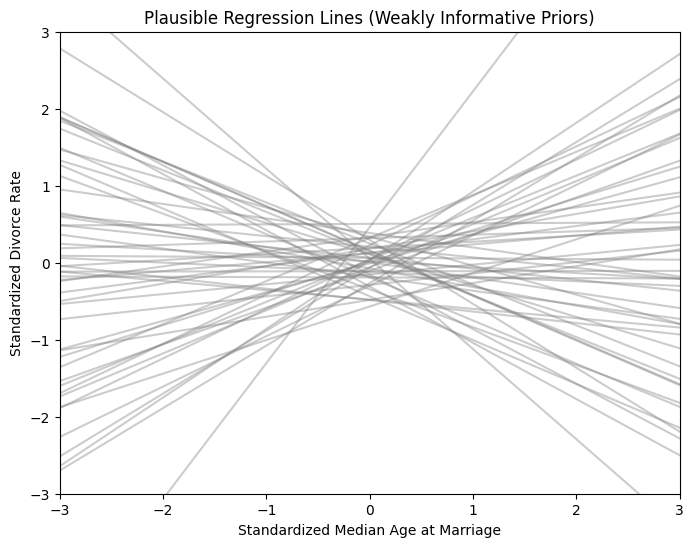

In [3]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

# 약한 정보성 사전 분포를 사용한 모델 정의
with pm.Model() as model:
    # Priors
    a = pm.Normal("a", mu=0, sigma=0.2)  # 절편
    bA = pm.Normal("bA", mu=0, sigma=0.5)  # 기울기
    sigma = pm.Exponential("sigma", lam=1)  # 오차

    # 선형 모델
    mu = a + bA * data["A"]  # A는 표준화된 MedianAgeMarriage 열
    D_obs = pm.Normal("D_obs", mu=mu, sigma=sigma, observed=data["D"])  # D는 표준화된 Divorce 열

    # 사전 분포 샘플링
    prior_samples = pm.sample_prior_predictive(samples=50, return_inferencedata=True)

# prior_predictive에서 a와 bA 추출
a_samples = prior_samples.prior["a"].values.flatten()  # a 샘플
bA_samples = prior_samples.prior["bA"].values.flatten()  # bA 샘플

# 회귀선 시각화
A_range = np.linspace(-3, 3, 100)  # A 범위 설정
plt.figure(figsize=(8, 6))
for i in range(len(a_samples)):
    plt.plot(
        A_range,
        a_samples[i] + bA_samples[i] * A_range,
        color="gray",
        alpha=0.4,
    )
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel("Standardized Median Age at Marriage")
plt.ylabel("Standardized Divorce Rate")
plt.title("Plausible Regression Lines (Weakly Informative Priors)")
plt.show()


--2025-01-18 20:52:32--  https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/WaffleDivorce.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3189 (3.1K) [text/plain]
Saving to: ‘WaffleDivorce.csv’

WaffleDivorce.csv   100%[===================>]   3.11K  --.-KB/s    in 0s      

2025-01-18 20:52:32 (52.9 MB/s) - ‘WaffleDivorce.csv’ saved [3189/3189]



Output()

Output()

Output()

Output()

<ipython-input-9-eb476f77fc53>:44: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  mu_PI_age = az.hdi(mu_samples_age.reshape(-1, 30), hdi_prob=0.89)
<ipython-input-9-eb476f77fc53>:48: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  mu_PI_marriage = az.hdi(mu_samples_marriage.reshape(-1, 30), hdi_prob=0.89)


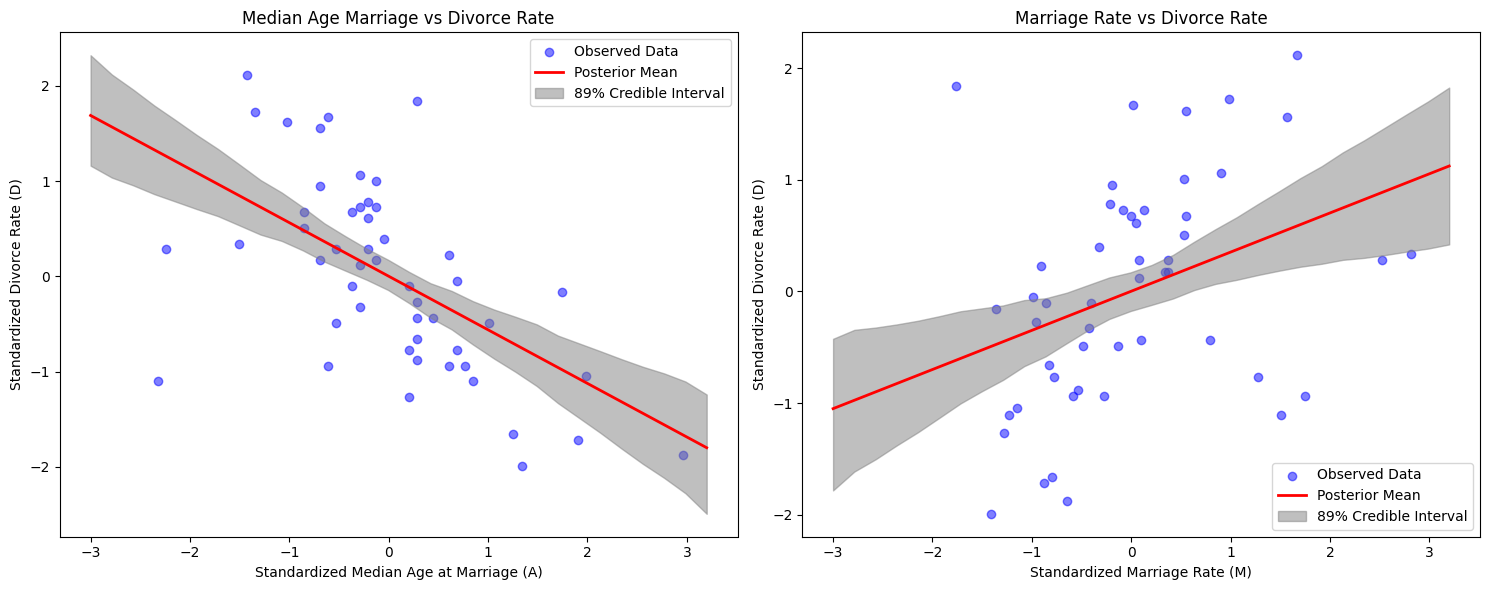

In [9]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 데이터 로드 및 표준화
!wget -O WaffleDivorce.csv https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/WaffleDivorce.csv
data = pd.read_csv("WaffleDivorce.csv", sep=";")
scaler = StandardScaler()
data["D"] = scaler.fit_transform(data[["Divorce"]])  # Divorce 표준화
data["A"] = scaler.fit_transform(data[["MedianAgeMarriage"]])  # MedianAgeMarriage 표준화
data["M"] = scaler.fit_transform(data[["Marriage"]])  # Marriage 표준화

# A_seq와 M_seq 설정
A_seq = np.linspace(-3, 3.2, 30)
M_seq = np.linspace(-3, 3.2, 30)

# PyMC 모델 정의 및 두 변수에 대한 모델링
# (1) Median Age Marriage -> Divorce Rate
with pm.Model() as model_age:
    a = pm.Normal("a", mu=0, sigma=0.2)  # 절편
    bA = pm.Normal("bA", mu=0, sigma=0.5)  # 기울기
    sigma = pm.Exponential("sigma", lam=1)  # 오차
    mu = pm.Deterministic("mu", a + bA * A_seq)
    D_obs = pm.Normal("D_obs", mu=a + bA * data["A"], sigma=sigma, observed=data["D"])
    trace_age = pm.sample(1000, return_inferencedata=True, cores=2)
    posterior_predictive_age = pm.sample_posterior_predictive(trace_age, var_names=["mu"], extend_inferencedata=True)

# (2) Marriage Rate -> Divorce Rate
with pm.Model() as model_marriage:
    a = pm.Normal("a", mu=0, sigma=0.2)  # 절편
    bM = pm.Normal("bM", mu=0, sigma=0.5)  # 기울기
    sigma = pm.Exponential("sigma", lam=1)  # 오차
    mu = pm.Deterministic("mu", a + bM * M_seq)
    D_obs = pm.Normal("D_obs", mu=a + bM * data["M"], sigma=sigma, observed=data["D"])
    trace_marriage = pm.sample(1000, return_inferencedata=True, cores=2)
    posterior_predictive_marriage = pm.sample_posterior_predictive(trace_marriage, var_names=["mu"], extend_inferencedata=True)

# 사후 분포 요약
mu_samples_age = posterior_predictive_age.posterior_predictive["mu"].values
mu_mean_age = mu_samples_age.mean(axis=(0, 1))
mu_PI_age = az.hdi(mu_samples_age.reshape(-1, 30), hdi_prob=0.89)

mu_samples_marriage = posterior_predictive_marriage.posterior_predictive["mu"].values
mu_mean_marriage = mu_samples_marriage.mean(axis=(0, 1))
mu_PI_marriage = az.hdi(mu_samples_marriage.reshape(-1, 30), hdi_prob=0.89)

# 두 그래프를 나란히 그리기
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# (1) Median Age Marriage -> Divorce Rate
axes[0].scatter(data["A"], data["D"], color="blue", label="Observed Data", alpha=0.5)
axes[0].plot(A_seq, mu_mean_age, color="red", lw=2, label="Posterior Mean")
axes[0].fill_between(A_seq, mu_PI_age[:, 0], mu_PI_age[:, 1], color="gray", alpha=0.5, label="89% Credible Interval")
axes[0].set_xlabel("Standardized Median Age at Marriage (A)")
axes[0].set_ylabel("Standardized Divorce Rate (D)")
axes[0].set_title("Median Age Marriage vs Divorce Rate")
axes[0].legend()

# (2) Marriage Rate -> Divorce Rate
axes[1].scatter(data["M"], data["D"], color="blue", label="Observed Data", alpha=0.5)
axes[1].plot(M_seq, mu_mean_marriage, color="red", lw=2, label="Posterior Mean")
axes[1].fill_between(M_seq, mu_PI_marriage[:, 0], mu_PI_marriage[:, 1], color="gray", alpha=0.5, label="89% Credible Interval")
axes[1].set_xlabel("Standardized Marriage Rate (M)")
axes[1].set_ylabel("Standardized Divorce Rate (D)")
axes[1].set_title("Marriage Rate vs Divorce Rate")
axes[1].legend()

plt.tight_layout()
plt.show()


## 5.1.1. Think before you regress

*   Divorce rate(D)
*   Marrage rate(M)
*   Median agea at mariage(A)



In [5]:
pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.6 MB/s eta 0:00:00


# 5.1.1 Think Before You Regress

### 문제 정의
다음 세 가지 관측 변수를 분석하고자 한다:
1. **이혼율 (D)**: 각 주의 이혼율
2. **결혼율 (M)**: 각 주의 결혼율
3. **중위 결혼 연령 (A)**: 각 주의 결혼 연령 중위값

이전 모델 및 그래프에서 확인한 바와 같이, $A$는 $D$에 강한 영향을 미치며, $M$ 역시 $D$와 연관이 있다. 그러나, 이러한 상관관계가 인과 관계를 의미하는지는 확실하지 않다.

이를 이해하기 위해 **DAG(Directed Acyclic Graph)**를 사용하여 변수 간 인과적 구조를 탐구한다.

---

### DAG의 기본 개념
DAG는 다음 요소들로 구성된다:
- **노드(Node)**: 변수 (예: $A$, $M$, $D$).
- **화살표(Arrow)**: 인과적 영향의 방향.
- **비순환(Acyclic)**: 인과 관계가 순환되지 않음.

아래는 분석에 사용할 DAG이다:
1. $A \to D$: 중위 결혼 연령이 이혼율에 직접적인 영향을 미침.
2. $M \to D$: 결혼율이 이혼율에 직접적인 영향을 미침.
3. $A \to M$: 중위 결혼 연령이 결혼율에 영향을 미침.

---

### DAG 시각화


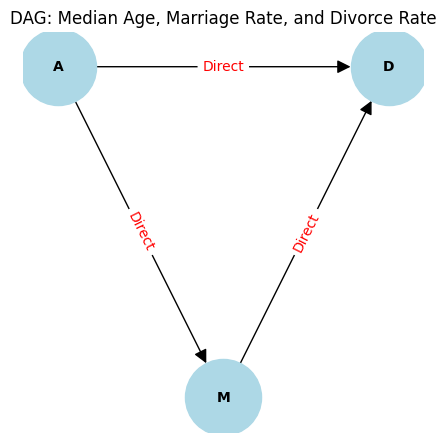

In [21]:
import matplotlib.pyplot as plt
import networkx as nx
import pymc as pm
import arviz as az
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# DAG 시각화 함수
def plot_dag():
    G = nx.DiGraph()
    G.add_edges_from([("A", "D"), ("A", "M"), ("M", "D")])

    pos = {
        "A": (0, 1),
        "M": (1, 0.5),
        "D": (2, 1),
    }

    plt.figure(figsize=(4, 4))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={
        ("A", "D"): "Direct",
        ("A", "M"): "Direct",
        ("M", "D"): "Direct"
    }, font_color="red", font_size=10)
    plt.title("DAG: Median Age, Marriage Rate, and Divorce Rate")
    plt.show()

# DAG 시각화
plot_dag()


### DAG 설명
위 DAG는 변수 간 인과 관계를 다음과 같이 나타낸다:
1. $A \to D$: 중위 결혼 연령은 이혼율에 직접적인 영향을 미침.
2. $A \to M \to D$: $A$가 $M$을 통해 $D$에 간접적인 영향을 미침 (매개 효과).
3. $M \to D$: 결혼율이 이혼율에 직접적인 영향을 미침.

이제 각 경로가 이혼율에 미치는 영향을 분석하기 위해, 통계 모델링을 수행한다.


### 결론은 아래와 같다.
- **$A \to D$**: 중위 결혼 연령은 이혼율에 강한 직접적 영향을 미친다.
- **$M \to D$**: 결혼율은 이혼율에 약한 영향을 미친다.
- **$A \to M \to D$**: 중위 결혼 연령이 결혼율을 통해 이혼율에 간접적으로 영향을 줄 가능성이 존재하나, 그 효과는 미미하다.

이 DAG와 모델링 결과는 **중위 결혼 연령(A)**이 이혼율(D)에 가장 중요한 요인임을 시사한다. 결혼율(M)은 $A$와 상호작용하며, 약간의 영향만 미친다.


---

# 5.1.2 Testable Implications: Comparing DAGs

## 조건부 독립성과 조건부 고정의 개념

## 조건부 독립(Conditional Independence)이란?

### 정의
두 변수 $X$와 $Y$가 세 번째 변수 $Z$를 기준으로 조건부 독립이라면, $Z$를 알았을 때 $X$와 $Y$는 서로 독립적이다.  
이를 수학적으로는 다음과 같이 표현한다:
$$
P(X, Y \mid Z) = P(X \mid Z) \cdot P(Y \mid Z)
$$
또는
$$
X \perp\!\!\!\perp Y \mid Z
$$

이는 $Z$를 알고 나면 $X$를 통해 $Y$에 대해 더 이상 추가 정보를 얻을 수 없다는 의미이다.

### 예제
- $X$: 오늘 우산을 들고 나왔는지 여부  
- $Y$: 오늘 비가 왔는지 여부  
- $Z$: 오늘 일기 예보  

$Z$를 알고 있다면, $X$가 $Y$에 대한 추가 정보를 주지 못한다.  
즉, $Z$로 인해 $X$와 $Y$는 조건부 독립이다.

---

## 조건부로 고정한다는 것은?

### 의미
"조건부로 고정한다"는 특정 변수 $Z$의 값을 고정하거나 관측했다고 가정하는 것을 의미한다.  
이 과정에서 $Z$를 통해 다른 변수 간의 관계를 다시 평가할 수 있다.

### 직관적인 설명
1. **모든 변수 간 관계를 원래 상태로 본다**: 예를 들어 $A \to M \to D$라는 경로가 있다면, 이 관계 전체를 그대로 두고 변수 간 관계를 본다.  
2. **조건부로 고정한다**: $Z$의 값을 알고 있다고 가정하고 $Z$의 영향을 제거한 상태에서 $X$와 $Y$ 간의 관계를 평가한다.

---

## DAG에서 조건부 고정의 효과

### 1. 독립성 생성
조건부 고정이 새로운 독립성을 생성할 수 있다.

#### 예시
- DAG: $A \to D$, $A \to M$  
- 조건: $A$를 고정하면 $M$과 $D$는 독립이다.  
- 이유: $A$가 $M$과 $D$의 공통 원인이므로 $A$를 조건부로 고정하면 서로 독립이 된다.

### 2. 독립성 소멸 (버거닝)
반대로 조건부 고정이 기존 독립성을 없앨 수도 있다.

#### 예시
- DAG: $X \to Z$, $Y \to Z$  
- 조건: $Z$를 고정하면 $X$와 $Y$는 독립하지 않게 된다.  
- 이유: $Z$가 $X$와 $Y$를 간접적으로 연결하기 때문이다.

---

## 예제: 조건부 독립성 평가

### DAG1: $A \to D$, $A \to M$, $M \to D$
- $A$를 조건부로 고정하지 않으면:
  - $D$와 $M$은 $A$와 $M \to D$ 경로 때문에 서로 관련이 있다.  
- $A$를 조건부로 고정하면:
  - $D$와 $M$은 여전히 $M \to D$ 경로로 연결되어 독립하지 않다.

### DAG2: $A \to D$, $A \to M$
- $A$를 조건부로 고정하지 않으면:
  - $D$와 $M$은 $A$라는 공통 원인으로 인해 서로 관련이 있다.  
- $A$를 조건부로 고정하면:
  - $D$와 $M$은 독립이다. $A$가 모든 정보를 제공했기 때문이다.

---

## 요약
1. 조건부 독립성은 특정 변수를 고정했을 때 두 변수가 독립인지 평가하는 개념이다.  
2. 조건부 고정은 DAG에서 특정 변수의 값을 알고 있다고 가정하는 행위이다.  
3. 조건부 독립성은 DAG의 구조와 변수 간 관계의 방향에 따라 달라진다.



---


## DAG 예제
### DAG1: $A \to D$, $A \to M$, $M \to D$
- 모든 변수 간에 인과 관계가 있음.
- **조건부 독립성 없음**.
- 모든 변수 쌍 ($D$, $A$, $M$)이 서로 연관.

### DAG2: $A \to D$, $A \to M$
- $A$가 $D$와 $M$을 매개.
- 조건부 독립성:
  - $D \perp\!\!\!\perp M | A$ (조건부로 $A$를 고정했을 때, $M$은 $D$와 독립적).


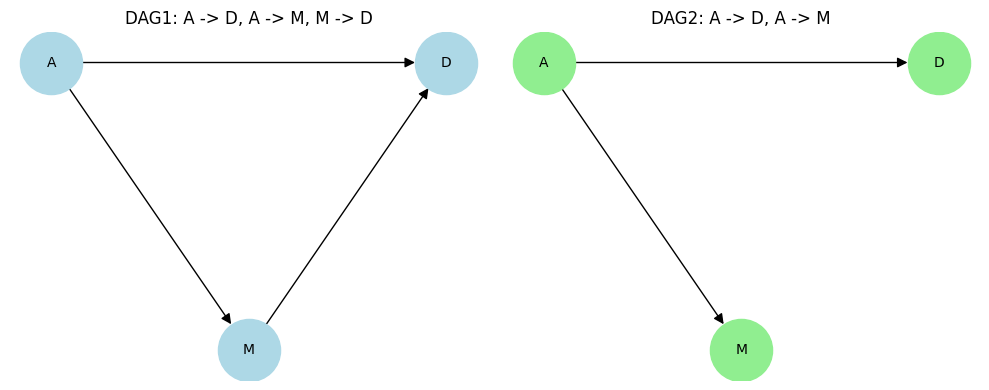

In [26]:
import matplotlib.pyplot as plt
import networkx as nx

# DAG 시각화 함수 (subplot 활용)
def plot_dags():
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 두 개의 그림을 한 행에 배치

    # DAG1: A -> D, A -> M, M -> D
    G1 = nx.DiGraph()
    G1.add_edges_from([("A", "D"), ("A", "M"), ("M", "D")])
    pos1 = {"A": (0, 1), "M": (1, 0.5), "D": (2, 1)}
    nx.draw(G1, pos1, with_labels=True, node_size=2000, node_color="lightblue", ax=axes[0], font_size=10, arrowsize=15)
    axes[0].set_title("DAG1: A -> D, A -> M, M -> D", fontsize=12)

    # DAG2: A -> D, A -> M
    G2 = nx.DiGraph()
    G2.add_edges_from([("A", "D"), ("A", "M")])
    pos2 = {"A": (0, 1), "M": (1, 0.5), "D": (2, 1)}
    nx.draw(G2, pos2, with_labels=True, node_size=2000, node_color="lightgreen", ax=axes[1], font_size=10, arrowsize=15)
    axes[1].set_title("DAG2: A -> D, A -> M", fontsize=12)

    plt.tight_layout()
    plt.show()

# DAG 시각화 실행
plot_dags()


## 조건부 독립성 분석
### DAG1 분석
- $A \to D$, $A \to M$, $M \to D$: 모든 변수 간에 인과 관계가 있어 조건부 독립성 없음.
- 모든 변수 쌍 ($D$, $A$, $M$)이 서로 연관.

### DAG2 분석
- $A$를 조건부로 고정 시, $D$와 $M$은 독립적 ($D \perp\!\!\!\perp M | A$).
- $A$를 제외하면 여전히 $D$와 $M$은 상관성을 가짐.


In [34]:
from pgmpy.models import BayesianNetwork

# DAG1 정의: A -> D, A -> M, M -> D
dag1 = BayesianNetwork([("A", "D"), ("A", "M"), ("M", "D")])

# DAG2 정의: A -> D, A -> M
dag2 = BayesianNetwork([("A", "D"), ("A", "M")])

# 조건부 독립성 테스트 함수
def is_independent(model, start, end, observed=None):
    observed = observed if observed else []  # 조건부 변수 설정
    active_trails = model.active_trail_nodes(start, observed=observed)  # 활성 연결 확인
    return end not in active_trails[start]

# DAG1 테스트
print("DAG1 (A -> D, A -> M, M -> D):")
print("Is D independent of M given A? ", is_independent(dag1, "D", "M", ["A"]))
print("Is D independent of A? ", is_independent(dag1, "D", "A"))

# DAG2 테스트
print("\nDAG2 (A -> D, A -> M):")
print("Is D independent of M given A? ", is_independent(dag2, "D", "M", ["A"]))
print("Is D independent of A? ", is_independent(dag2, "D", "A"))


DAG1 (A -> D, A -> M, M -> D):
Is D independent of M given A?  False
Is D independent of A?  False

DAG2 (A -> D, A -> M):
Is D independent of M given A?  True
Is D independent of A?  False


## 조건부 독립성의 요약
### 첫 번째 DAG의 조건부 독립성
- 첫 번째 DAG에서는 **조건부 독립성(Conditional Independence)**이 존재하지 않음.
- 따라서 **모든 변수 쌍이 서로 연관되어야 함**.
- 이 DAG의 테스트 가능한 암시:
  - 모든 변수 쌍($D$, $A$, $M$)은 어떤 조건에서도 연관되어 있어야 함.

### 두 번째 DAG의 조건부 독립성
- 두 번째 DAG의 테스트 가능한 암시:
  - $D$와 $M$은 조건이 없을 때는 연관되어야 함.
  - $D$와 $M$은 $A$를 고정했을 때 독립적이어야 함. 즉:
    $$ D \perp\!\!\!\perp M | A $$

---

## 조건부 독립성 테스트와 다중 회귀
### 다중 회귀를 활용한 조건부 독립성 검증
- 다중 회귀는 다음과 같은 기술적 질문을 해결하는 데 도움을 줌:
  1. 이미 결혼율($M$)을 알고 있는 상황에서, 중위 결혼 연령($A$)에 대해 추가적으로 알면 어떤 가치가 있는가?
  2. 이미 중위 결혼 연령($A$)을 알고 있는 상황에서, 결혼율($M$)에 대해 추가적으로 알면 어떤 가치가 있는가?

### 다중 회귀 결과의 해석
- 각 변수에 해당하는 **계수(parameter)** 추정값이 위 질문에 대한 대답임.
- 이러한 질문과 대답은 기술적(descriptive)이지만, DAG를 통해 도출된 테스트 가능한 암시를 바탕으로 인과적(causal) 해석을 가질 수 있음.

---

## Rethinking: "Control"의 의미
- 통계적 "통제(statistical control)"와 실험적 "통제(experimental control)"는 완전히 다름.
- 통계적 "통제"는 실험적 통제를 대체할 수 없으며, 이를 오해하면 통계적 방법론의 힘을 과대평가하는 문화를 조장할 수 있음.
- 통계적 통제의 한계:
  - 분석은 특정 DAG(가정된 인과 관계)에 의존하므로, 잘못된 DAG를 기반으로 한 해석은 틀릴 수 있음.
- 언어 사용의 중요성:
  - 통계적 "통제"라는 용어의 사용은 신중해야 함.
  - 잘못된 언어는 오해를 불러일으킬 수 있음.

---

## 결론
- 첫 번째 DAG와 두 번째 DAG의 차이는 $D \perp\!\!\!\perp M | A$의 성립 여부.
- 이를 검증하기 위해 다중 회귀를 수행하며, 각 변수의 추가적인 정보가 결과에 미치는 영향을 확인할 수 있음.
- 하지만 결과의 해석은 DAG의 신뢰성에 의존하므로, DAG 설정 자체가 중요함.


---
# 다중 회귀 모델을 활용한 이혼율 예측

## 모델 설명
다중 회귀(Multiple Regression)를 사용하여 이혼율을 결혼율과 중위 결혼 연령의 함수로 예측한다.  
다중 회귀 모델의 일반적인 형태는 다음과 같다:

$$
D_i \sim \mathcal{N}(\mu_i, \sigma)
$$
$$
\mu_i = \alpha + \beta_M M_i + \beta_A A_i
$$

- \( D_i \): 주 \( i \)의 표준화된 이혼율  
- \( M_i \): 주 \( i \)의 표준화된 결혼율  
- \( A_i \): 주 \( i \)의 표준화된 중위 결혼 연령  

### 파라미터의 사전 분포 (Priors)
- 절편 $(\alpha)$: $$\alpha \sim \mathcal{N}(0, 0.2)$$  
- 결혼율 기울기 $(\beta_M)$: $$\beta_M \sim \mathcal{N}(0, 0.5)$$  
- 중위 결혼 연령 기울기 $(\beta_A)$: $$\beta_A \sim \mathcal{N}(0, 0.5)$$  
- 잔차의 표준편차 $(\sigma)$: $$\sigma \sim \text{Exponential}(1)$$  

## 코드 실행
아래 Python 코드를 실행하여 다중 회귀 모델을 구축하고, 결과를 확인할 수 있다.


--2025-01-18 21:39:28--  https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/WaffleDivorce.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3189 (3.1K) [text/plain]
Saving to: ‘WaffleDivorce.csv’

WaffleDivorce.csv   100%[===================>]   3.11K  --.-KB/s    in 0s      

2025-01-18 21:39:28 (48.1 MB/s) - ‘WaffleDivorce.csv’ saved [3189/3189]



Output()

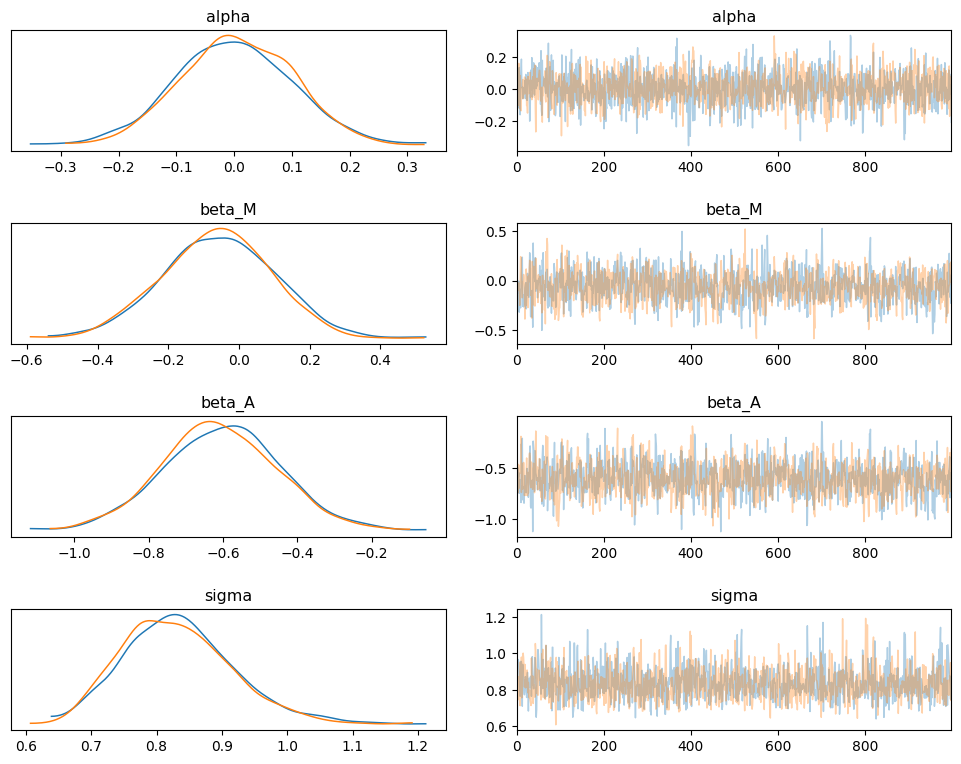

In [39]:
# 필요한 라이브러리 임포트
import numpy as np
import pymc as pm
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import arviz as az

# 데이터 로드 및 표준화
!wget -O WaffleDivorce.csv https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/WaffleDivorce.csv
data = pd.read_csv("WaffleDivorce.csv", sep=";")
scaler = StandardScaler()
data["D"] = scaler.fit_transform(data[["Divorce"]])  # 이혼율 표준화
data["M"] = scaler.fit_transform(data[["Marriage"]])  # 결혼율 표준화
data["A"] = scaler.fit_transform(data[["MedianAgeMarriage"]])  # 중위 결혼 연령 표준화

# 다중 회귀 모델 정의
with pm.Model() as model:
    # Priors
    alpha = pm.Normal("alpha", mu=0, sigma=0.2)  # 절편
    beta_M = pm.Normal("beta_M", mu=0, sigma=0.5)  # 결혼율 기울기
    beta_A = pm.Normal("beta_A", mu=0, sigma=0.5)  # 중위 결혼 연령 기울기
    sigma = pm.Exponential("sigma", lam=1)  # 잔차의 표준편차

    # 선형 모델
    mu = alpha + beta_M * data["M"] + beta_A * data["A"]
    D_obs = pm.Normal("D_obs", mu=mu, sigma=sigma, observed=data["D"])

    # 샘플링
    trace = pm.sample(1000, return_inferencedata=True, cores=2)

# 사후 분포 요약 및 시각화
az.plot_trace(
    trace,
    var_names=["alpha", "beta_M", "beta_A", "sigma"],
    figsize=(10, 8),  # 그래프 크기 조정
    compact=False     # 그래프 간격 최적화
)

# 그래프 레이아웃 자동 조정
plt.tight_layout(pad=2.0)  # 그래프 위아래 간격을 늘리기 위해 패딩 설정
plt.show()



# 5.1.3 - 5.1.5: 다중 회귀 및 해석

## 1. 다중 회귀식 (Multiple Regression Notation)
다중 회귀 모델은 다수의 예측 변수를 결과 변수와 연결하는 선형 모델이다. 다음은 이혼율 $D_i$를 결혼율 $M_i$와 중위 결혼 연령 $A_i$로 예측하는 모델이다:

$$
\begin{align*}
D_i &\sim \mathcal{N}(\mu_i, \sigma) \\
\mu_i &= \alpha + \beta_M M_i + \beta_A A_i \\
\alpha &\sim \mathcal{N}(0, 0.2) \\
\beta_M &\sim \mathcal{N}(0, 0.5) \\
\beta_A &\sim \mathcal{N}(0, 0.5) \\
\sigma &\sim \text{Exponential}(1)
\end{align*}
$$

### 주요 개념
1. $\mu_i$: $i$번째 주의 이혼율의 평균값.
2. $\alpha$: 절편, 모든 예측 변수가 0일 때의 이혼율.
3. $\beta_M$: 결혼율이 이혼율에 미치는 영향의 기울기.
4. $\beta_A$: 중위 결혼 연령이 이혼율에 미치는 영향의 기울기.
5. $\sigma$: 데이터의 오차(잔차) 크기.

---

## 2. 사후분포 근사 (Approximating the Posterior)
모델을 통해 다음과 같은 사후분포를 얻을 수 있다:

| 파라미터 | 평균 (Mean) | 표준편차 (SD) | 5.5% | 94.5% |
|----------|-------------|---------------|------|-------|
| $\alpha$ | $0.00$    | $0.10$      | $-0.16$ | $0.16$ |
| $\beta_M$ | $-0.07$   | $0.15$      | $-0.31$ | $0.18$ |
| $\beta_A$ | $-0.61$   | $0.15$      | $-0.85$ | $-0.37$ |
| $\sigma$ | $0.79$    | $0.08$      | $0.66$ | $0.91$ |

### 해석
- **$\beta_M$**: 결혼율이 이혼율에 미치는 추가적 영향은 거의 없음을 보여준다 ($0$ 부근의 값).
- **$\beta_A$**: 중위 결혼 연령이 이혼율에 미치는 영향은 유의미하며 음의 상관관계를 나타냄.

---

## 3. 조건부 독립성 테스트
두 개의 DAG를 비교하여 조건부 독립성을 확인한다:
1. DAG1: $A \to D, A \to M, M \to D$
2. DAG2: $A \to D, A \to M$

### 조건부 독립성 결과
- DAG1: $D \not\perp M | A$ (조건부 독립 아님)
- DAG2: $D \perp M | A$ (조건부 독립)

### 해석
- DAG1에서는 결혼율 $M$이 이혼율 $D$에 직접적인 영향을 미침.
- DAG2에서는 중위 결혼 연령 $A$가 결혼율과 이혼율 모두에 영향을 미치며, 결혼율과 이혼율 간의 연관성은 $A$를 통해 간접적으로 나타남.

---

## 4. 잔차를 활용한 다중 회귀 해석 (Predictor Residual Plots)
### 모델 정의
결혼율 $M_i$의 잔차를 계산하기 위해 중위 결혼 연령 $A_i$만 사용하는 모델:
$$
\begin{align*}
M_i &\sim \mathcal{N}(\mu_i, \sigma) \\
\mu_i &= \alpha + \beta_A A_i \\
\alpha &\sim \mathcal{N}(0, 0.2) \\
\beta_A &\sim \mathcal{N}(0, 0.5) \\
\sigma &\sim \text{Exponential}(1)
\end{align*}
$$

### 잔차 계산
- $M_i - \mu_i$를 잔차로 계산하며, 이 잔차를 이혼율 $D_i$에 대한 회귀에 사용.
- 중위 결혼 연령의 잔차 역시 유사하게 계산 가능.

### 결과 및 시각화
- **결혼율의 잔차**와 이혼율: 거의 상관이 없음.
- **중위 결혼 연령의 잔차**와 이혼율: 강한 음의 상관관계를 보임.


# 5.1.5 Plotting Multivariate Posteriors

## 개요
예측 변수가 한 개일 때는 간단히 그래프로 시각화할 수 있었지만, 두 개 이상의 예측 변수를 사용하는 다변량 회귀 모델에서는 더 많은 그래프가 필요하다. 이를 해석하기 위해 다음 세 가지 유형의 그래프를 살펴본다:

1. **Predictor Residual Plots**
   - 결과 변수와 잔차를 비교한다.
   - 통계 모형을 이해하는 데 도움이 되지만, 다른 역할은 크게 없다.

2. **Posterior Prediction Plots**
   - 원본 데이터와 모형 예측 결과를 비교한다.
   - 학습 및 예측 결과를 평가하기 위해 사용된다.

3. **Counterfactual Plots**
   - 가상의 실험 결과를 예측한다.
   - 특정 변수의 인과적 영향을 탐구하기 위해 사용된다.

---

## 5.1.5.1 Predictor Residual Plots

### 개념
예측 변수 잔차(residuals)는 특정 예측 변수를 나머지 예측 변수로 설명했을 때의 평균 오차를 나타낸다. 이를 통해 다른 모든 예측 변수를 통제한 상태에서 특정 예측 변수와 결과 변수 간의 선형 관계를 분석할 수 있다.

### 예제: 결혼율과 이혼율
이혼율 모형에서 결혼율($M$)의 잔차를 계산하기 위해 중위 결혼 연령($A$)을 통제한 모형을 정의한다.

#### 수식
- $M \sim \text{Normal}(\mu, \sigma)$
- $\mu = a + b_{AM} \cdot A$
- $a \sim \text{Normal}(0, 0.2)$
- $b_{AM} \sim \text{Normal}(0, 0.5)$
- $\sigma \sim \text{Exponential}(1)$

#### 잔차 계산
결혼율의 실제 값에서 예측 값을 뺀 값으로 잔차를 계산한다:
$$ \text{Residual}_M = M - \hat{M} $$

### 결과 시각화
잔차와 이혼율의 관계를 시각화한다.
- **x축**: 결혼율 잔차
- **y축**: 이혼율 변수
- 선형 회귀선을 추가하여 이혼율과 결혼율 잔차 간의 선형 관계를 보여준다.


--2025-01-18 23:48:23--  https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/WaffleDivorce.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3189 (3.1K) [text/plain]
Saving to: ‘WaffleDivorce.csv’

WaffleDivorce.csv   100%[===================>]   3.11K  --.-KB/s    in 0s      

2025-01-18 23:48:23 (27.5 MB/s) - ‘WaffleDivorce.csv’ saved [3189/3189]



Output()

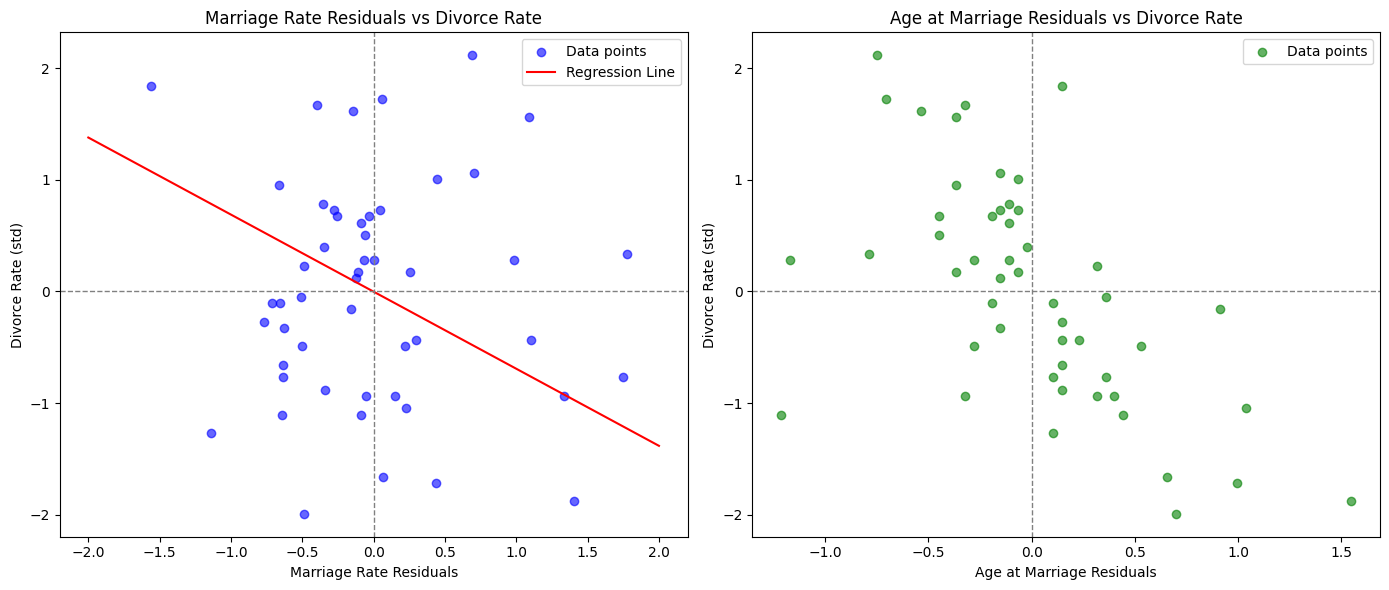

In [6]:
import pymc as pm
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import arviz as az
import numpy as np

# 데이터 로드 및 표준화
!wget -O WaffleDivorce.csv https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/WaffleDivorce.csv
data = pd.read_csv("WaffleDivorce.csv", sep=";")
scaler = StandardScaler()
data["s_divorce"] = scaler.fit_transform(data[["Divorce"]])  # 이혼율 표준화
data["s_marriage"] = scaler.fit_transform(data[["Marriage"]])  # 결혼율 표준화
data["s_age"] = scaler.fit_transform(data[["MedianAgeMarriage"]])  # 중위 결혼 연령 표준화

# 중위 결혼 연령으로 결혼율 예측 모델 정의
with pm.Model() as model_M_from_A:
    a = pm.Normal("a", mu=0, sigma=0.2)  # 절편
    bAM = pm.Normal("bAM", mu=0, sigma=0.5)  # 회귀 기울기
    sigma = pm.Exponential("sigma", lam=1)  # 잔차 표준편차

    mu = a + bAM * data["s_age"]
    M_obs = pm.Normal("M_obs", mu=mu, sigma=sigma, observed=data["s_marriage"])

    trace_residuals = pm.sample(1000, return_inferencedata=True, cores=2)

# 결혼율 잔차 계산
mu_M_resid = trace_residuals.posterior["a"].mean().values + \
             trace_residuals.posterior["bAM"].mean().values * data["s_age"]
residuals_M = data["s_marriage"] - mu_M_resid

# 회귀선을 계산
regression_line = trace_residuals.posterior["a"].mean().values + \
                  trace_residuals.posterior["bAM"].mean().values * np.linspace(-2, 2, 100)

# 잔차와 이혼율 시각화
plt.figure(figsize=(14, 6))

# 결혼율 잔차와 이혼율
plt.subplot(1, 2, 1)
plt.scatter(residuals_M, data["s_divorce"], color="blue", alpha=0.6, label="Data points")
plt.plot(np.linspace(-2, 2, 100), regression_line, color="red", label="Regression Line")
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.axvline(0, color="gray", linestyle="--", linewidth=1)
plt.xlabel("Marriage Rate Residuals")
plt.ylabel("Divorce Rate (std)")
plt.title("Marriage Rate Residuals vs Divorce Rate")
plt.legend()

# 중위 결혼 연령 잔차 계산 및 시각화
residuals_A = data["s_age"] - ((data["s_marriage"] - residuals_M) * trace_residuals.posterior["bAM"].mean().values)
plt.subplot(1, 2, 2)
plt.scatter(residuals_A, data["s_divorce"], color="green", alpha=0.6, label="Data points")
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.axvline(0, color="gray", linestyle="--", linewidth=1)
plt.xlabel("Age at Marriage Residuals")
plt.ylabel("Divorce Rate (std)")
plt.title("Age at Marriage Residuals vs Divorce Rate")
plt.legend()

plt.tight_layout()
plt.show()


# 5.1.5.2 Posterior Prediction Plots

## 개요
모형의 예측 결과와 실제 값을 비교하는 작업은 매우 중요하다. 이는 다음과 같은 두 가지 목적을 가지고 있다:

1. **모형이 Posterior 분포를 제대로 학습했는가?**
   - 모형이 데이터의 분포를 잘 학습했는지 확인한다.

2. **모형이 어떤 부분에서 어떻게 실패하는가?**
   - 실패한 부분을 확인하고, 모형 개선 방향을 탐구한다.

---

## Posterior Predictive Check 수행

이혼율 예제에서 Posterior Predictive Check를 수행하는 과정은 다음과 같다:

1. **Posterior 예측값 계산**
   - 기존 데이터를 사용해 예측 결과를 시뮬레이션한다.
   - Posterior 평균($\mu$)과 신뢰 구간(Percentile Interval)을 계산한다.

$$
\mu_{\text{mean}} = \text{mean}(\mu_{\text{obs}})
$$

$$
\mu_{\text{PI}} = [\text{PI}_{5\%}, \text{PI}_{95\%}]
$$

2. **관측치와 예측치 비교**
   - 관측치($D_{\text{obs}}$)와 Posterior 예측치($D_{\text{pred}}$)를 비교하는 그래프를 그린다.
   - 예측치와 관측치 간의 관계를 시각화하여 모형의 성능을 평가한다.

---

## 결과 해석
특정 주(Idaho, Utah)에서 예측치와 관측치 간의 차이가 크게 나타난 이유는 다음과 같다:

- **문화적 요인**: 두 주는 예수 그리스도 후기 성도 교회(The Church of Jesus Christ of Latter-day Saints)의 신도 비율이 높아, 결혼 연령 외에도 이혼율에 영향을 미치는 독특한 요인이 존재한다.
- **데이터의 제한**: 이와 같은 변수들이 모형에 포함되지 않았기 때문에, 해당 지역에서 모형이 적합하지 않을 수 있다.




In [8]:
import pymc as pm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import arviz as az
import numpy as np

# 데이터 로드 및 표준화
!wget -O WaffleDivorce.csv https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/WaffleDivorce.csv
data = pd.read_csv("WaffleDivorce.csv", sep=";")
scaler = StandardScaler()
data["s_divorce"] = scaler.fit_transform(data[["Divorce"]])  # 이혼율 표준화
data["s_marriage"] = scaler.fit_transform(data[["Marriage"]])  # 결혼율 표준화
data["s_age"] = scaler.fit_transform(data[["MedianAgeMarriage"]])  # 중위 결혼 연령 표준화

# 다중 회귀 모델 정의
with pm.Model() as model_multiple:
    alpha = pm.Normal("alpha", mu=0, sigma=0.2)  # 절편
    beta_M = pm.Normal("beta_M", mu=0, sigma=0.5)  # 결혼율 기울기
    beta_A = pm.Normal("beta_A", mu=0, sigma=0.5)  # 중위 결혼 연령 기울기
    sigma = pm.Exponential("sigma", lam=1)  # 잔차의 표준편차

    mu = alpha + beta_M * data["s_marriage"] + beta_A * data["s_age"]
    D_obs = pm.Normal("D_obs", mu=mu, sigma=sigma, observed=data["s_divorce"])

    trace_multiple = pm.sample(1000, return_inferencedata=True, cores=2)

# Posterior 예측값 계산
mu_obs = trace_multiple.posterior["alpha"].mean().values + \
         trace_multiple.posterior["beta_M"].mean().values * data["s_marriage"].values + \
         trace_multiple.posterior["beta_A"].mean().values * data["s_age"].values

# numpy array로 변환
mu_obs = np.array(mu_obs)

# 신뢰 구간 계산
mu_obs_mean = mu_obs.mean()
mu_obs_PI = az.hdi(mu_obs, hdi_prob=0.89)

# 관측치와 예측치 비교 시각화
plt.figure(figsize=(10, 6))
plt.errorbar(data["s_divorce"], mu_obs,
             yerr=[mu_obs - mu_obs_PI[:, 0], mu_obs_PI[:, 1] - mu_obs],
             fmt='o', color='blue', label='Predicted vs Observed')
plt.axline((0, 0), slope=1, color='orange', linestyle='--', label='y=x')
plt.xlabel("Observed Divorce Rate")
plt.ylabel("Predicted Divorce Rate")
plt.title("Posterior Predictive Check: Divorce Rate")
plt.legend()
plt.show()


--2025-01-18 23:50:24--  https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/WaffleDivorce.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3189 (3.1K) [text/plain]
Saving to: ‘WaffleDivorce.csv’

WaffleDivorce.csv   100%[===================>]   3.11K  --.-KB/s    in 0s      

2025-01-18 23:50:24 (33.2 MB/s) - ‘WaffleDivorce.csv’ saved [3189/3189]



Output()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 1000x600 with 0 Axes>

## 1. 잔차(Predictor Residual)란?
잔차는 모형이 예측한 값과 실제 값의 차이를 의미한다.  
\[
\text{잔차} = \text{실제 값} - \text{예측 값}
\]

예를 들어, 결혼율(M)을 중위 결혼 연령(A)으로 설명한 후,  
결혼율에서 중위 결혼 연령으로 설명되지 않은 부분이 잔차이다.

## 2. 잔차는 왜 중요한가?
잔차는 다른 모든 변수를 통제한 상태에서 특정 변수와 결과 변수 간의 순수한 관계를 보여준다.  
- 결혼율의 잔차와 이혼율: 큰 관계가 없다.  
- 중위 결혼 연령의 잔차와 이혼율: 강한 음의 상관관계가 있다.  

결론적으로, 결혼율 자체보다는 중위 결혼 연령이 이혼율에 더 큰 영향을 미친다.

## 3. Posterior Prediction Plots
Posterior Prediction Plots는 모형이 데이터를 얼마나 잘 설명하는지 평가하기 위해 사용된다.  
- 관측값과 예측값을 비교해 모형의 성능을 평가한다.  
- 예를 들어, 특정 주(Idaho, Utah)에서 관측값과 예측값 간의 큰 차이는 다음과 같은 이유 때문이다:
  1. 문화적 요인: 특정 지역의 독특한 사회적 요인.  
  2. 모형의 한계: 데이터를 완벽히 설명하지 못함.



  



---
---
---
---
---

# 5.1.5.3 Counterfactual Plots

Counterfactual plots는 관측되지 않은 변수 조합에 대한 예측 결과를 확인하는 데 유용하다. 이는 변수 간의 인과적 관계를 이해하고, 특정 변수의 값을 조작했을 때의 결과를 예측할 수 있도록 도와준다. Counterfactual simulation의 주요 단계는 다음과 같다.

1. **값을 변경할 변수 선택 (intervention variable)**  
   예를 들어, Age at Marriage 값을 조작한다고 가정한다.

2. **변수의 구간 설정**  
   변수의 가능한 값 범위를 설정한다. 예를 들어, $A$를 $-2$에서 $2$까지로 설정.

3. **Posterior 샘플을 이용한 시뮬레이션**  
   선택한 변수의 값 변화에 따른 결과 변수(Divorce rate)와 다른 변수(Marriage rate)의 변화를 계산.

---

### Age at Marriage가 Divorce Rate에 미치는 Counterfactual Effect
아래는 $A \to D$와 $A \to M \to D$ 경로를 포함한 Counterfactual simulation을 수행하는 코드다.

$$
\mu_D = \alpha + \beta_M \cdot M + \beta_A \cdot A
$$

### Marriage Rate가 Divorce Rate에 미치는 Counterfactual Effect
$M$ 값을 조작하는 경우, $A \to M$ 경로는 제거되어 아래와 같은 관계만 남는다.

$$
D = \alpha + \beta_M \cdot M
$$

---

### Counterfactual Simulation의 결과 해석
- **Age at Marriage**를 조작했을 때 **Divorce Rate**는 명확한 음의 관계를 보인다.
- 반면, **Marriage Rate**를 조작했을 때의 효과는 미미하며, 이는 $M \to D$ 관계가 약하기 때문이다.
---

모델을 활용하여 결혼 연령 중위값을 20에서 30으로 증가시켰을 때 이혼율의 변화를 시뮬레이션하면 다음과 같은 결과를 얻을 수 있다:
- 결혼 연령이 높아지면 이혼율은 크게 감소하지만, 실제로는 과도한 추정일 가능성이 크다.

### 중요한 점
Counterfactual 분석에서는 특정 변수를 조작하면 해당 변수에 영향을 미치는 경로를 제거해야 한다.
예를 들어, \( M \)을 조작하면 DAG에서 \( A → M \) 화살표가 사라지고, \( M \)은 더 이상 \( A \)의 영향을 받지 않는다.



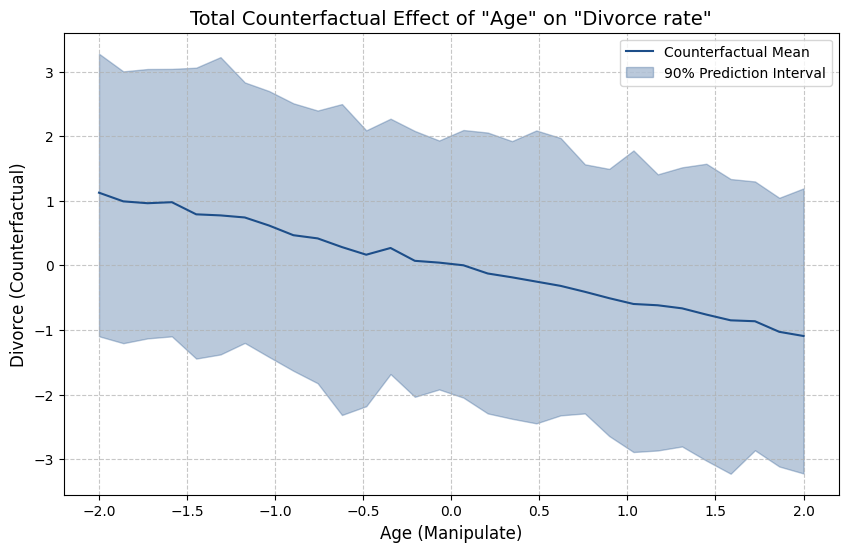

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 시뮬레이션 데이터 생성
A_manipulated = np.linspace(-2, 2, 30)

# 모형에서 추출된 posterior 샘플
np.random.seed(42)  # 재현 가능성을 위한 시드 설정
n_samples = 1000

# Posterior 샘플링된 파라미터 (모형 결과 기반)
a = np.random.normal(0, 0.2, n_samples)
bA = np.random.normal(-0.61, 0.15, n_samples)
bM = np.random.normal(-0.07, 0.15, n_samples)
aM = np.random.normal(0, 0.2, n_samples)
bAM = np.random.normal(-0.69, 0.1, n_samples)
sigma = np.random.exponential(1, n_samples)
sigma_M = np.random.exponential(1, n_samples)

# 시뮬레이션: M 변수 생성
M_simulated = np.array([
    np.random.normal(aM + bAM * A, sigma_M)
    for A in A_manipulated
]).T

# 시뮬레이션: D 변수 생성
D_simulated = np.array([
    np.random.normal(a + bA * A + bM * M_simulated[:, i], sigma)
    for i, A in enumerate(A_manipulated)
]).T

# Counterfactual 결과 정리
D_mean = D_simulated.mean(axis=0)
D_PI_05 = np.percentile(D_simulated, 5, axis=0)
D_PI_94 = np.percentile(D_simulated, 95, axis=0)

# 결과를 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.plot(A_manipulated, D_mean, label='Counterfactual Mean', color='#1D4E89')
plt.fill_between(A_manipulated, D_PI_05, D_PI_94, color='#1D4E89', alpha=0.3, label='90% Prediction Interval')
plt.title('Total Counterfactual Effect of "Age" on "Divorce rate"', fontsize=14)
plt.xlabel('Age (Manipulate)', fontsize=12)
plt.ylabel('Divorce (Counterfactual)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Counterfactual Plots의 의미

Counterfactual plot은 특정 변수를 조작했을 때 다른 변수의 값이 어떻게 변하는지 보여주는 그래프이다. 이 그래프는 모형이 변수 간의 관계를 바탕으로 예측한 결과를 시각화한 것이다.

### 그래프의 구성
1. **X축**: 조작한 변수 (예: 나이, 결혼율 등)
   - 나이를 -2에서 2까지 조작하며, 가상의 값을 설정한다.
2. **Y축**: 결과 변수 (예: 이혼율)
   - 조작된 변수 값에 따라 모형이 예측한 결과 변수의 값을 나타낸다.
3. **중앙선**: 예측값의 평균
   - 특정 변수 값을 조작했을 때 예상되는 평균 결과를 나타낸다.
4. **음영 영역**: 예측 구간
   - 결과 변수 값이 있을 가능성이 높은 범위를 나타낸다.

### 그래프가 보여주는 것
- 나이를 조작했을 때 이혼율이 어떻게 변하는지를 나타낸다.
- 그래프에 따르면, 나이가 많아질수록 이혼율이 낮아지는 경향이 있다.
- 음영 영역이 좁을수록 모형의 예측에 대한 신뢰도가 높다.

### 결론
이 그래프는 변수 간의 인과적 관계를 바탕으로 가상의 시나리오를 실험해볼 수 있게 해준다. 이를 통해 모형의 예측 결과를 직관적으로 이해할 수 있다.

---

# 5.2 Masked Relationship
# 다중 회귀와 변수 간 관계

## **1. 다중 회귀란?**
- **회귀 분석**은 어떤 변수(결과, Y)에 다른 변수(원인, X)가 얼마나 영향을 미치는지 알아내는 방법이다.
- 현실에서는 결과(Y)에 영향을 주는 요인이 여러 개 있을 수 있다.
  - 예: **이혼율(D)**에 영향을 주는 요인
    1. **결혼율(M)**
    2. **결혼 연령(A)**

- **다중 회귀 분석**은 여러 요인을 한꺼번에 분석하여 각각의 요인이 결과에 얼마나 영향을 미치는지 알아내는 방법이다.

---

## **2. 다중 회귀 분석이 중요한 이유**
1. **가짜 상관 관계 제거**
   - 변수 간의 관계가 있어 보이지만, 실제로는 제3의 요인이 영향을 준 경우가 있다.
   - 다중 회귀는 이런 가짜 관계를 걸러낼 수 있다.
   - 예: 결혼율(M)이 이혼율(D)에 영향을 미치는 것처럼 보이지만, 실제로는 결혼 연령(A)의 영향일 수 있다.

2. **진정한 인과 관계 추론**
   - 여러 요인이 섞여 있을 때, 각 요인의 독립적인 효과를 명확히 추정할 수 있다.

---

## **3. 예시: Milk 데이터 분석**
### **사용된 변수**
1. **kcal.per.g (K)**: 우유 1g당 칼로리
2. **mass (M)**: 동물의 평균 체중
3. **neocortex.perc (N)**: 대뇌 신피질이 차지하는 비율 (%)

---

## **4. 단일 변수 회귀 분석**
1. **K ~ N (칼로리 ~ 신피질 비율)**  
   - 분석 결과: 신피질 비율이 칼로리에 영향을 거의 주지 않는다 ($b_N \approx 0.13$).  
   - 관계가 약한 것으로 나타난다.

2. **K ~ M (칼로리 ~ 체중)**  
   - 분석 결과: 체중(M)이 칼로리(K)와 음의 관계를 보인다 ($b_M \approx -0.28$).  
   - 체중이 무거울수록 칼로리가 낮아지는 경향이 있다.

---

## **5. 다중 회귀 분석**
### **다중 회귀 모형: $K \sim N + M$**
- $K = a + b_N \cdot N + b_M \cdot M$

### **분석 결과**
1. **신피질 비율($N$)**: 영향이 강해졌다 ($b_N \approx 0.68$).  
2. **체중($M$)**: 영향이 더 강해졌다 ($b_M \approx -0.70$).  

### **왜 이런 결과가 나왔을까?**
- 단일 변수 모형에서는 다른 변수의 영향을 고려하지 않았기 때문이다.
- 예를 들어, 체중(M)과 신피질 비율(N)은 서로 양의 상관 관계가 있어 서로의 효과를 흐리게 했다.
- 다중 회귀 분석을 통해 각 변수의 **독립적인 효과**를 확인할 수 있었다.

---

## **6. DAG와 Markov Equivalence**
### Markov Equivalence

DAG에서 중요한 점은, 관찰된 데이터만으로는 항상 변수 간의 관계 구조를 정확히 알 수 없다는 것이다. **Markov Equivalence**는 동일한 조건부 독립성을 가지는 DAG의 집합을 의미하며, 다음과 같은 이유로 발생한다:

- DAG 구조의 차이는 관찰된 데이터만으로 구별되지 않을 수 있다.
- 서로 다른 DAG가 동일한 확률 분포를 생성할 수 있다.

예를 들어:

1. $M \to N \to K$
2. $M \leftarrow N \to K$
3. $M \to N \leftarrow K$

위 세 구조는 조건부 독립 관계에 따라 동일한 확률 분포를 나타낼 수 있다.

### **DAG로 나타낸 변수 관계**
1. $M \to N$, $M \to K \leftarrow N$
2. $M \leftarrow N$, $M \to K \leftarrow N$
3. 숨겨진 요인 $U$: $M \leftarrow U \to N$, $M \to K \leftarrow N$

### **중요한 점**
- 데이터만으로는 어떤 구조가 맞는지 알 수 없다.
- 이를 Markov Equivalence 집합이라 하며, 동일한 조건부 독립 관계를 가지는 DAG의 집합을 뜻한다.
- 과학적 지식을 바탕으로 가장 그럴듯한 모형을 선택해야 한다.

---

## **7. Counterfactual Plot**
- **Counterfactual Plot**은 가상의 실험을 수행할 수 있는 도구이다.
- 예를 들어:
  - 체중(M)을 고정하고 신피질 비율(N)을 조작하여 칼로리(K)가 어떻게 변하는지 관찰한다.

### **활용**
1. **진정한 인과 관계 시뮬레이션**
   - 특정 변수의 변화를 조작하여 결과 변수에 미치는 영향을 시뮬레이션한다.

2. **실험 불가능한 상황 대안**
   - 실제로 수행할 수 없는 실험을 모형 기반으로 분석하여 변수 간 관계를 이해할 수 있다.

---

## **8. 핵심 요약**
1. **다중 회귀 분석**은
   - 가짜 상관 관계를 제거하고,
   - 각 변수의 진정한 효과를 추적할 수 있게 해준다.

2. 단일 변수로는 알 수 없는 변수 간 관계를 명확히 이해할 수 있다.

3. **Counterfactual Plot**은 실험이 불가능한 상황에서도 가상의 시뮬레이션으로 인과 관계를 확인할 수 있는 강력한 도구이다.


In [11]:
import pymc as pm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 로드 및 전처리
!wget -O milk.csv https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/milk.csv
data = pd.read_csv("milk.csv")
scaler = StandardScaler()
data["K"] = scaler.fit_transform(data[["kcal.per.g"]])  # 에너지
data["N"] = scaler.fit_transform(data[["neocortex.perc"]])  # 대뇌 신피질 비중
data["M"] = scaler.fit_transform(np.log(data[["mass"]]))  # 체중 (로그 변환)

# 결측치 제거
data = data.dropna(subset=["K", "N", "M"])

# 단일 변수 모형: kcal ~ neocortex
with pm.Model() as model_kn:
    a = pm.Normal("a", mu=0, sigma=0.2)
    bN = pm.Normal("bN", mu=0, sigma=0.5)
    sigma = pm.Exponential("sigma", lam=1)

    mu = a + bN * data["N"]
    K_obs = pm.Normal("K_obs", mu=mu, sigma=sigma, observed=data["K"])

    trace_kn = pm.sample(1000, return_inferencedata=True, cores=2)

# 단일 변수 모형: kcal ~ mass
with pm.Model() as model_km:
    a = pm.Normal("a", mu=0, sigma=0.2)
    bM = pm.Normal("bM", mu=0, sigma=0.5)
    sigma = pm.Exponential("sigma", lam=1)

    mu = a + bM * data["M"]
    K_obs = pm.Normal("K_obs", mu=mu, sigma=sigma, observed=data["K"])

    trace_km = pm.sample(1000, return_inferencedata=True, cores=2)

# 다중 변수 모형: kcal ~ neocortex + mass
with pm.Model() as model_knm:
    a = pm.Normal("a", mu=0, sigma=0.2)
    bN = pm.Normal("bN", mu=0, sigma=0.5)
    bM = pm.Normal("bM", mu=0, sigma=0.5)
    sigma = pm.Exponential("sigma", lam=1)

    mu = a + bN * data["N"] + bM * data["M"]
    K_obs = pm.Normal("K_obs", mu=mu, sigma=sigma, observed=data["K"])

    trace_knm = pm.sample(1000, return_inferencedata=True, cores=2)

# 결과 요약
print("kcal ~ neocortex")
print(az.summary(trace_kn, var_names=["a", "bN", "sigma"]))

print("\nkcal ~ mass")
print(az.summary(trace_km, var_names=["a", "bM", "sigma"]))

print("\nkcal ~ neocortex + mass")
print(az.summary(trace_knm, var_names=["a", "bN", "bM", "sigma"]))

# Coefficient 비교
az.plot_forest([trace_kn, trace_km, trace_knm], var_names=["bN", "bM"],
               model_names=["kcal ~ neocortex", "kcal ~ mass", "kcal ~ neocortex + mass"])
plt.show()


--2025-01-18 23:54:24--  https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/milk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1957 (1.9K) [text/plain]
Saving to: ‘milk.csv’

milk.csv            100%[===================>]   1.91K  --.-KB/s    in 0s      

2025-01-18 23:54:25 (25.0 MB/s) - ‘milk.csv’ saved [1957/1957]



KeyError: "None of [Index(['kcal.per.g'], dtype='object')] are in the [columns]"

# 5.3 Categorical Variables

## 카테고리 변수
통계 모델링에서 **카테고리 변수**는 이산적이며 순서가 없는 값을 가지는 변수로, 특정 카테고리의 존재 여부가 결과 변수에 미치는 영향을 분석할 때 자주 사용된다. 여기서는 **Binary Categories (이항 변수)** 를 중심으로 다룬다.

## 5.3.1 Binary Categories
데이터에서 `male` 변수는 지시 변수(Indicator Variable)로 사용되며, 카테고리 변수 처리 방법에는 두 가지가 있다.

### (1) Indicator Variable
지시 변수를 직접 모형에 포함하여 수치형 변수처럼 처리한다. 이 방식의 주요 특징은:
- $\beta$는 특정 카테고리의 존재에 따른 효과를 나타냄.
- 특정 카테고리(예: 남성)의 불확실성이 더 커질 수 있음.
  
모형 수식:
$$
h_i \sim \text{Normal}(\mu_i, \sigma)
$$
$$
\mu_i = \alpha + \beta_m \cdot m_i \quad (m_i = 1 \, \text{or} \, 0)
$$
$$
\alpha \sim \text{Normal}(178, 20), \, \beta_m \sim \text{Normal}(0, 10), \, \sigma \sim \text{Uniform}(0, 50)
$$

Indicator Variable은 특정 그룹에 속하는지 여부를 1과 0으로 표시한다.  
예를 들어, 남자는 $m = 1$, 여자는 $m = 0$으로 처리한다.

모형은 다음과 같다:
$$
h_i \sim \text{Normal}(\mu_i, \sigma)
$$
$$
\mu_i = \alpha + \beta_m \cdot m_i
$$

- $\alpha$는 기본 평균이다.
- $\beta_m$는 특정 그룹(예: 남자)의 추가 효과를 나타낸다.
- $m_i$는 1(그룹에 속함) 또는 0(그룹에 속하지 않음)이다.

---

### (2) Index Variable
Index Variable은 카테고리 개수만큼 $\alpha$ 값을 생성하여 각 카테고리에 적용한다. 이 방식의 주요 특징은:
- 다중 카테고리를 처리하기 용이함.
- 카테고리별 불확실성을 비슷하게 유지함.

모형 수식:
$$
h_i \sim \text{Normal}(\mu_i, \sigma)
$$
$$
\mu_i = \alpha_{\text{SEX}[i]}
$$
$$
\alpha_j \sim \text{Normal}(178, 20) \quad (j = 1, 2), \, \sigma \sim \text{Uniform}(0, 50)
$$

Index Variable은 여러 그룹을 구분할 때 사용하며, 각 그룹마다 별도의 평균 값을 가진다.  


예를 들어, 남자, 여자, 어린이 그룹이 있다면 각 그룹에 대해 $\alpha_{\text{SEX}[i]}$를 구한다.

모형은 다음과 같다:
$$
h_i \sim \text{Normal}(\mu_i, \sigma)
$$
$$
\mu_i = \alpha_{\text{SEX}[i]}
$$

- $\alpha_j$는 각 그룹(예: 남자, 여자, 어린이)의 평균 값이다.
- $j$는 그룹 번호를 나타낸다.

#### 차이점 요약

- **Indicator Variable:** 두 그룹(예: 남자/여자)을 구분하며, 그룹별 추가 효과를 계산한다.
- **Index Variable:** 여러 그룹(예: 남자/여자/어린이)을 구분하며, 각 그룹마다 별도의 평균 값을 사용한다.


In [12]:
import pymc as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 데이터 생성
!wget -O Howell1.csv https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv
data = pd.read_csv("Howell1.csv")
data["sex"] = np.where(data["male"] == 1, 2, 1)  # Index Variable

# Index Variable 모델 정의
with pm.Model() as model_index:
    # 카테고리별 alpha 값
    alpha = pm.Normal("alpha", mu=178, sigma=20, shape=2)
    sigma = pm.Uniform("sigma", lower=0, upper=50)

    # mu 정의 (카테고리에 따라 alpha 선택)
    mu = alpha[data["sex"] - 1]  # sex 값을 1-based index로 사용
    height_obs = pm.Normal("height_obs", mu=mu, sigma=sigma, observed=data["height"])

    # 샘플링
    trace_index = pm.sample(1000, return_inferencedata=True, cores=2)

# Posterior 요약
print(az.summary(trace_index, var_names=["alpha", "sigma"]))

# 남성과 여성의 키 차이 계산
alpha_samples = trace_index.posterior["alpha"].values
diff_fm = alpha_samples[:, :, 0] - alpha_samples[:, :, 1]

# 요약 결과
print("남성과 여성 키 차이 (Posterior 요약):")
print(f"평균 차이: {diff_fm.mean():.2f}, 89% 신뢰 구간: {np.percentile(diff_fm, [5.5, 94.5])}")

# 시각화
plt.figure(figsize=(8, 6))
plt.hist(diff_fm.flatten(), bins=30, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Posterior Distribution of Height Difference (Male - Female)")
plt.xlabel("Height Difference")
plt.ylabel("Frequency")
plt.axvline(diff_fm.mean(), color="red", linestyle="--", label=f"Mean: {diff_fm.mean():.2f}")
plt.legend()
plt.show()


--2025-01-18 23:55:25--  https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12205 (12K) [text/plain]
Saving to: ‘Howell1.csv’

Howell1.csv         100%[===================>]  11.92K  --.-KB/s    in 0s      

2025-01-18 23:55:25 (33.1 MB/s) - ‘Howell1.csv’ saved [12205/12205]



KeyError: 'male'

# 5.3.2 Many Categories

## 카테고리의 수가 많아질 때
카테고리 개수가 2개일 때는 지시 변수를 사용하거나 Index 변수를 사용하는 것이 모두 용이하다. 그러나 카테고리 개수가 많아질수록 지시 변수 방식은 비효율적이다. **k개의 카테고리**가 있을 경우 **k-1개의 지시 변수**가 필요하며, 관리와 해석이 어려워진다. 이를 해결하기 위해 **Index Variable**을 사용하는 것이 효과적이다.

---

## 예제: Milk 데이터의 Clade 변수
### 데이터 구조
Milk 데이터에서 `clade` 변수는 종(species)의 분류체계를 나타낸다. 각 카테고리를 고유한 숫자(Index)로 변환하여 모델에 활용할 수 있다.

### 모델 수식
카테고리가 많을 경우에도 Index 변수를 활용하면 간단한 모델로 카테고리별 평균과 분산을 추정할 수 있다.
$$
K \sim \text{Normal}(\mu, \sigma)
$$
$$
\mu = \alpha_{\text{clade}[i]}
$$
$$
\alpha_{\text{clade}[j]} \sim \text{Normal}(0, 0.5), \, \sigma \sim \text{Exponential}(1)
$$

---

## 결과 해석
- $\alpha_{\text{clade}[j]}$: 각 카테고리(clade)의 기대값을 나타냄.
- $\sigma$: 모든 카테고리의 공통 표준편차.

Posterior 샘플링 결과를 통해 각 clade에 대한 기대값과 신뢰 구간을 추정할 수 있다.

---

## 시각화
- 각 clade의 Posterior 분포를 그래프로 시각화하여 기대값과 신뢰 구간을 확인한다.
- 카테고리 이름을 라벨로 추가하여 가독성을 높인다.


In [13]:
import pymc as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 데이터 로드 및 전처리
!wget -O milk.csv https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/milk.csv
milk = pd.read_csv("milk.csv")

# clade 변수 처리 및 표준화
milk["clade_id"] = milk["clade"].astype("category").cat.codes + 1  # Index 생성 (1-based)
scaler = StandardScaler()
milk["K"] = scaler.fit_transform(milk[["kcal.per.g"]])

# 다중 카테고리 모델 정의
with pm.Model() as model_clade:
    # 카테고리별 alpha 값
    alpha = pm.Normal("alpha", mu=0, sigma=0.5, shape=milk["clade_id"].nunique())
    sigma = pm.Exponential("sigma", lam=1)

    # mu 정의 (clade_id에 따라 alpha 선택)
    mu = alpha[milk["clade_id"] - 1]
    K_obs = pm.Normal("K_obs", mu=mu, sigma=sigma, observed=milk["K"])

    # 샘플링
    trace_clade = pm.sample(1000, return_inferencedata=True, cores=2)

# Posterior 요약
az_summary = az.summary(trace_clade, var_names=["alpha", "sigma"])
print(az_summary)

# 시각화를 위한 데이터 준비
alpha_means = trace_clade.posterior["alpha"].mean(("chain", "draw")).values
alpha_hdi = az.hdi(trace_clade, var_names=["alpha"], hdi_prob=0.89)

# 카테고리 이름과 추정 결과 매핑
clade_labels = milk["clade"].astype("category").cat.categories
clade_summary = pd.DataFrame({
    "Clade": clade_labels,
    "Mean": alpha_means,
    "Lower": alpha_hdi.sel(hdi="lower").values.flatten(),
    "Upper": alpha_hdi.sel(hdi="upper").values.flatten(),
})

# 결과 시각화
plt.figure(figsize=(10, 6))
for i, row in clade_summary.iterrows():
    plt.errorbar(row["Mean"], i, xerr=[[row["Mean"] - row["Lower"]], [row["Upper"] - row["Mean"]]], fmt="o", label=row["Clade"])

plt.yticks(range(len(clade_labels)), clade_labels)
plt.axvline(0, color="gray", linestyle="--")
plt.xlabel("Expected kcal (std)")
plt.title("Posterior Estimates for Clade")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Clades", loc="lower right")
plt.tight_layout()
plt.show()


--2025-01-18 23:56:23--  https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/milk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1957 (1.9K) [text/plain]
Saving to: ‘milk.csv’

milk.csv            100%[===================>]   1.91K  --.-KB/s    in 0s      

2025-01-18 23:56:23 (27.3 MB/s) - ‘milk.csv’ saved [1957/1957]



KeyError: 'clade'

---
# QNA1
151페이지의 세 가지 구조는 Markov 동등성 집합에 속하기 때문에 데이터만으로는 어느 구조가 맞는지 판단할 수 없다. 하지만 아래와 같은 방법으로 유력한 구조를 좁혀갈 수 있다.

1. **과학적 지식 활용**  
   변수 간의 인과관계를 생물학적 또는 이론적 배경에 기반하여 판단할 수 있다. 예를 들어, 몸 크기가 신피질 비율에 영향을 미칠 가능성이 더 타당하다고 판단되면 첫 번째 모델이 유력하다.

    -  cf)  첫 번째 모델:
$M \to N$, $M \to K \leftarrow N$

    -- **구조**
    -- 체중(\( M \))이 신피질 비율(\( N \))에 영향을 미친다.
    -- 체중(\( M \))과 신피질 비율(\( N \)) 모두 칼로리(\( K \))에 독립적으로 영향을 준다.


2. **시뮬레이션 및 모델 비교**  
   세 가지 모델을 기반으로 데이터를 시뮬레이션하여 각 모델이 실제 데이터와 얼마나 잘 맞는지 비교한다. `dagitty`와 같은 도구를 활용할 수 있다.

3. **실험적 개입**  
   변수 중 하나를 조작하여 다른 변수에 미치는 영향을 관찰하면 인과관계를 확인할 수 있다. 하지만, 현실적으로 어려운 경우가 많다.

4. **잠재 변수 탐지**  
   세 번째 모델에서 제시된 잠재 변수 \( U \)의 가능성을 확인하거나 배제하기 위해 추가 데이터를 수집하거나 다른 분석 기법을 적용할 수 있다.

결론적으로, 데이터를 넘어서 과학적 지식과 시뮬레이션을 활용하여 가장 타당한 구조를 가정하고 분석을 진행하는 것이 필요하다.


---
# QNA2

### 1. 통계 모델이 할 수 있는 것과 못하는 것
통계 모델은 주어진 데이터 안에서만 작동한다. 우리가 측정하지 않았거나 아예 생각하지 못한 변수가 있다면, 모델이 그걸 직접적으로 찾아낼 방법은 없다. 책에서 말한 "if we cannot think of the right variable, we might never notice"라는 문장이 딱 이걸 말하고 있다. 우리가 떠올리지 못한 변수는 모델에서도 당연히 반영되지 못하니까 아무리 정교한 모델이라도 빈칸을 남긴 채 계산하게 된다.

하지만 관찰된 변수들 간의 관계에 숨은 변수의 흔적이 남아 있다면, 모델이 그 간접적인 영향을 포착할 가능성은 있다. 다중 회귀 분석 같은 방법은 관찰된 변수 간의 상관관계 속에서 숨은 변수의 단서를 잡아내는 데 도움을 줄 수 있다. 물론, 이건 어디까지나 우리가 이미 숨은 변수의 가능성을 알고 있다는 전제에서만 가능한 일이다.

---

### 2. 과학은 원래 숨은 변수를 찾아내는 과정이다
과학의 역사를 보면 숨은 변수, 즉 기존에 모르고 있던 원인을 찾아내는 과정의 반복이었다. 예를 들어:
- **천왕성의 궤도 문제**는 해왕성이라는 새로운 행성을 발견하는 계기가 됐다.
- **빛의 속도 불변성**은 에테르라는 숨은 변수 가설을 폐기하고 특수 상대성 이론으로 이어졌다.

과학은 언제나 기존 이론으로 설명할 수 없는 현상을 다루며 발전했다. 그래서 숨은 변수를 발견하려는 노력은 단순히 데이터 분석의 문제가 아니라, 창의적이고 비판적인 사고의 영역이라고 할 수 있다.

---

### 3. 딥러닝은 숨은 변수를 어떻게 다룰 수 있을까?
딥러닝은 데이터 안에서 복잡한 패턴과 비선형 관계를 학습하는 데 강점이 있다. 오토인코더(Autoencoder)나 변분 오토인코더(VAE) 같은 모델은 데이터의 숨은 구조를 잠재 공간(latent space)에 압축하여 표현할 수 있다. 이걸 보면 딥러닝이 숨은 변수와 관련된 단서를 잡아내는 데 도움을 줄 수 있다고 생각할 수 있다.

하지만 딥러닝에도 한계가 있다. 데이터에 없는 정보는 딥러닝도 알 수 없다. 그리고 딥러닝이 학습한 잠재 공간이 실제로 무엇을 의미하는지 해석하는 것도 쉽지 않다. 설명 가능한 AI(Explainable AI) 연구가 이 문제를 해결하려고 노력 중이지만, 아직 완전히 만족스러운 수준은 아니다.

---

### 4. 그래서, 우리가 할 수 있는 것
숨은 변수를 다룰 때 중요한 건 결국 인간의 사고다. 통계 모델이나 딥러닝은 데이터를 기반으로 패턴을 학습할 뿐이다. 진정으로 새로운 변수를 발견하고, 이를 검증하는 건 데이터 바깥에서의 상상력과 가설 검증 과정에서 나온다.

결국 질문에 대한 답은 이렇다:
1. 모델만으로는 관찰되지 않은 변수를 직접적으로 추적할 수 없다.
2. 하지만 관찰된 변수들 간의 관계 속에서 숨은 변수의 단서를 간접적으로 추론할 수는 있다.
3. 딥러닝은 숨은 변수의 구조를 학습할 가능성을 제공하지만, 데이터에 의존하고 해석하기 어렵다는 한계가 있다.
4. 결국, 이런 질문을 다룰 때 중요한 건 과학적 사고와 창의적인 가설 설정이다.